In [1]:
import pandas as pd

In [2]:
 # datetime_str = "2022-07-18_20_07"
 # results = pd.read_csv("outputs/{}.csv".format(datetime_str), dtype={"Stop Flags": str})

In [3]:
 #results

In [4]:
 #results[results["Stop Flags"].str.contains("10000")]

{32, 2, 6, 11, 29}
{40, 42, 45, 48, 22}
{40, 41, 15, 17, 31}
{33, 37, 9, 42, 23}
{0, 39, 16, 20, 31}
{0, 40, 41, 43, 46}
{33, 3, 41, 10, 17}
{2, 38, 42, 43, 12}
{4, 42, 16, 17, 28}
{3, 9, 42, 14, 26}
{38, 41, 45, 49, 22}
{14, 47, 16, 25, 28}
{34, 8, 19, 21, 25}
{44, 12, 47, 22, 23}
{1, 3, 44, 28, 29}
{34, 37, 9, 28, 31}
{11, 49, 18, 20, 29}
{35, 6, 42, 46, 22}
{43, 47, 24, 25, 28}
{2, 3, 37, 43, 48}
{4, 36, 39, 40, 49}
{35, 41, 47, 20, 21}
{34, 40, 9, 48, 19}
{0, 46, 16, 48, 28}
{33, 7, 10, 45, 46}
{4, 6, 46, 48, 18}
{2, 6, 48, 17, 20}
{38, 7, 39, 49, 21}
{33, 35, 5, 6, 30}
{36, 7, 9, 18, 24}
{2, 8, 12, 18, 30}
{32, 11, 12, 13, 21}
{35, 37, 5, 13, 27}
{11, 16, 48, 20, 29}
{1, 44, 13, 19, 24}
{39, 8, 9, 20, 30}
{33, 38, 7, 41, 11}
{37, 7, 42, 22, 24}
{34, 39, 9, 47, 30}
{37, 11, 48, 17, 23}
{38, 41, 11, 46, 16}
{35, 9, 13, 45, 46}
{33, 38, 45, 15, 49}
{34, 6, 47, 48, 20}
{38, 7, 44, 19, 30}
{35, 6, 9, 48, 20}
{2, 4, 41, 11, 45}
{6, 13, 45, 23, 25}
{1, 4, 6, 45, 30}
{11, 48, 19, 22, 28}


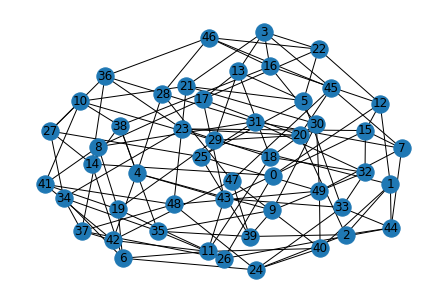

In [5]:
import time
import GlobalConstants
import DebugConstants as db
from MulticastPackingInstance import MulticastPackingInstance
from Solvers.Impls.WarmStartColGenMcpSolver import WarmStartColGenMcpSolver
from Solvers.Impls.WarmStartPerturbedDualColGenMcpSolver import WarmStartPerturbedDualColGenMcpSolver
from Solvers.Impls.PureColGenMcpSolver import PureColGenMcpSolver
from Solvers.Impls.PerturbedColGenMcpSolver import PerturbedColGenMcpSolver
n = 50
m = 125
k = 100
s = 5
d = 10
instance = MulticastPackingInstance(n,m,k,s,d)
instance.print_graph()

In [6]:
solverList = [WarmStartColGenMcpSolver(instance=instance),
              #PureColGenMcpSolver(instance=instance),
              #PureColGenMcpSolver(instance=instance, block_approx=1),
              #PerturbedColGenMcpSolver(instance=instance),
             ]
for solver in solverList:
    total_time = 0
    #while(not (solver.stop_flag & ~GlobalConstants.STOP_FLAG_TOL_MET)):
    while(not solver.stop_flag):
        prev_time = time.perf_counter()
        solver.perform_iteration()
        new_time = time.perf_counter()
        total_time += new_time - prev_time
        if total_time > GlobalConstants.MAX_TIME:
            solver.stop_flag |= GlobalConstants.STOP_FLAG_TIMEOUT

Set parameter Username


KeyboardInterrupt: 

In [ ]:
for solver in solverList:
    print(type(solver))
    
    if type(solver) == type(solverList[0]):
        print("y")
        print(solver.transition_iteration)
        print("{:05b}".format(solver.first_stop_flag))
        y = solver.solution[solver.transition_iteration]
        print(solver.lamb(y))

    print("x")
    print(solver.iteration)
    print("{:05b}".format(solver.stop_flag))
    x = solver.solution[solver.iteration]
    print(solver.lamb(x))
    print()
    

In [ ]:
# from Solvers.Impls.PureColGenMcpSolver import cost
# x = solver.solution[solver.iteration]
# p = solver.p(x)
# q = solver.q(x)
# T = solver.new_trees
# for i in range(k):
#     print("New Cost: {}   Old Cost: {}   Reduced Cost: {}".format(cost(T[i], p), q[i], cost(T[i], p)-q[i]))